# Compare responses in full - reduced model

Run the protocol PASSIVE_SYN with the full Gillies & Willshaw (2005) STN model, then reduce the model according to our Marasco folding algorithm, then rerun protocol and compare responses

The protocol PASSIVE_SYN is as follows:

- disable all active conductances (set gbar to zero for all except leak conductance)

- choose random synaptic locations in dendritic tree and place simple bi-exponential synapses

- each synapse received a single spike, all spikes are separated by a 100 ms pause

In [ ]:
# Enable interactive plots with backend 'notebook'
%matplotlib notebook

# Enable connecting with ipyton console --existing
# %connect_info

# print code version (hash of checked out version)
!git log -1

# print date and time of script execution
import datetime
print("\nNotebook executed at at {} in following directory:".format(datetime.datetime.now()))
%cd ..
%pwd

# Original Model

## Inspect model

- Open NEURON GUI

- To display synapses by name use `Tools > Point Processes > Managers > Point Group`

- Select `Show all > Exp2Syn`

- Hold mouse and swipe over all listed synapses to mark them on cell diagram (blue dot)

In [ ]:
from evalmodel.stn_model_evaluation import *

full_model = StnModel.Gillies2005
red_model = StnModel.Gillies_FoldMarasco

# Make cell model and evaluator
evaluator = StnModelEvaluator(full_model, PhysioState.NORMAL)
evaluator.build_cell(full_model)

# Open GUI
# from neuron import gui

Cell diagram with all synaptic inputs marked:

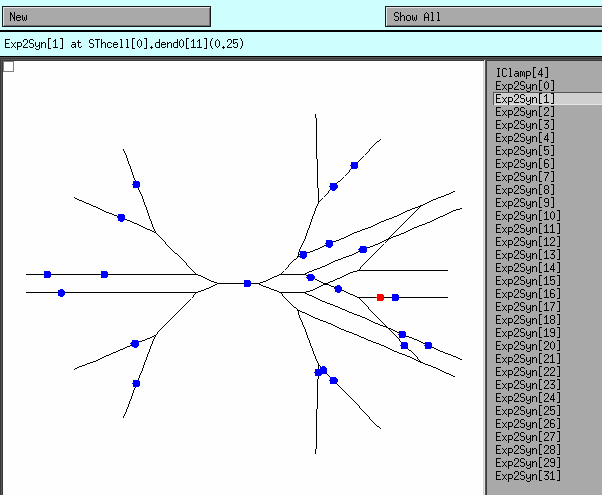

## Simulate model

In [ ]:
proto = StimProtocol.PASSIVE_SYN

# Run protocol
evaluator.setup_run_protocol(proto)
evaluator.plot_traces(proto)

# Simulate reduced model

In [ ]:
# Model reduction
evaluator.build_cell(red_model)
evaluator.target_model = red_model

# Run Protocol
evaluator.setup_run_protocol(proto)
evaluator.plot_traces(proto)

# Inspect model
# from neuron import gui

In [ ]:
from neuron import gui